In [11]:
"""
Created on Apr 28 2025
@author: Ricky
"""

import six
import os  # needed navigate the system to get the input data
import radiomics
from radiomics import featureextractor
import SimpleITK as sitk
import numpy as np
import nrrd
from PIL import Image
from matplotlib import pyplot as plt
import cv2
from glob import glob
import pandas as pd

In [12]:
#returns list of radiomic features for each mask
def computeRadiomicFeatures(imPath, maskPath, display_images = 0):
    
    #getting paths of directories and images
    imName = os.path.splitext(os.path.basename(imPath))[0]
    imDir = os.path.dirname(imPath)
    maskName = os.path.splitext(os.path.basename(maskPath))[0]
    maskDir = os.path.dirname(maskPath)
    maskGray = cv2.imread(maskPath, cv2.IMREAD_GRAYSCALE)
    imGray = cv2.imread(imPath, cv2.IMREAD_GRAYSCALE)
    
    #defining radiomics settings
    settings = {}
    settings['force2D'] = True
    #instantiating extractor, 2D shape disabled by default so we have to enable
    extractor = featureextractor.RadiomicsFeatureExtractor(**settings)
    extractor.enableFeatureClassByName('shape2D')
    #print('Extraction parameters:\n\t', extractor.settings)
    #print('Enabled filters:\n\t', extractor.enabledImagetypes)
    #print('Enabled features:\n\t', extractor.enabledFeatures)

    # Ensure the mask is binary (0 or 255)
    maskBinary = np.where(maskGray > 0, 1, 0).astype(np.uint8)

    # Create the masked image
    maskedImage = imGray * maskBinary

    image_sitk = sitk.GetImageFromArray(maskedImage)
    mask_sitk = sitk.GetImageFromArray(maskBinary)
    
    if(display_images == 1):
        # Display the image, mask, and masked image in subplots
        plt.figure(figsize=(15, 5))

        # Display the original image
        plt.subplot(1, 3, 1)
        plt.imshow(imGray, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        # Display the mask
        plt.subplot(1, 3, 2)
        plt.imshow(maskBinary, cmap='gray')
        plt.title('Mask')
        plt.axis('off')

        # Display the masked image
        plt.subplot(1, 3, 3)
        plt.imshow(maskedImage, cmap='gray')
        plt.title('Masked Image')
        plt.axis('off')

        plt.show()


    # Ensure the image and mask have the correct dimensions (2D)
    image_sitk.SetSpacing((1.0, 1.0))  # Set a dummy spacing if needed
    mask_sitk.SetSpacing((1.0, 1.0))   # Set a dummy spacing if needed

    features = extractor.execute(image_sitk, mask_sitk)

    featureList = []
    featureNames= []
    featureList.append(imName)
    featureNames.append('imName')
    for key, value in six.iteritems(features):
        #ignore metadata
        if('diagnostics') not in key:
            if (type(value) == np.ndarray ):
                featureList.append(value.item())
            else:
                featureList.append(value)
                
    allKeys = features.keys()
    featureNamesTemp = [item for item in allKeys if ('diagnostics' not in item)]
    featureNames.extend(featureNamesTemp)
            
    return featureList, featureNames

In [13]:
dataDir =  r"C:\Users\rckyh\Desktop\repo\kidney_ped\kidney\\"
imDir =  dataDir + "images\\raw\\"
maskDir =  dataDir + "images\masks\\"
output = dataDir + 'radiomics.csv'

# images have a base name, then the raw images have _mask.png and the segmentations
# have _cortex_segmentation.png so have to manipulate the directories a bit first
i = 0
featureListAllImages = []
for pngFile in glob(os.path.join(imDir, "*.png")):
    
    if i < 3:
        print(pngFile)

        rawImageName = os.path.basename(pngFile)
        imageNameComponents =  rawImageName.split('_')[:-1]
        imageBaseName = '_'.join(imageNameComponents)

        imPath = imDir + rawImageName
        maskPath = maskDir + (imageBaseName + "_cortex_segmentation.png")
        maskGray = cv2.imread(maskPath, cv2.IMREAD_GRAYSCALE)
        if(np.sum(maskGray)!= 0):
            featureListAllMasks, featureNames = computeRadiomicFeatures(imPath, 
                                                                        maskPath,
                                                                       display_images = 0)

            featureListAllImages.append(featureListAllMasks)
        i = i +1
    
print('Saving: ', output)
statsDF = pd.DataFrame(featureListAllImages, columns = featureNames)
statsDF.to_csv(output, index=False)

C:\Users\rckyh\Desktop\repo\kidney_ped\kidney\\images\raw\100__Still_images_5376_IM-0001-0023_masked.png


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


C:\Users\rckyh\Desktop\repo\kidney_ped\kidney\\images\raw\100__Still_images_5376_IM-0001-0034_masked.png


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


C:\Users\rckyh\Desktop\repo\kidney_ped\kidney\\images\raw\101__Still_images_5377_IM-0002-0009_masked.png


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Saving:  C:\Users\rckyh\Desktop\repo\kidney_ped\kidney\\radiomics.csv


# Scratchpad

In [ ]:
data_dir =  r"C:\Users\rckyh\Desktop\repo\kidney_ped\kidney\\"
imPath = data_dir + "images\\raw\\" + "100__Still_images_5376_IM-0001-0023_masked.png"
maskPath = data_dir + "images\masks\\" + "100__Still_images_5376_IM-0001-0023_cortex_segmentation.png"

imName = os.path.splitext(os.path.basename(imPath))[0]
imDir = os.path.dirname(imPath)
maskName = os.path.splitext(os.path.basename(maskPath))[0]
maskDir = os.path.dirname(maskPath)
maskGray = cv2.imread(maskPath, cv2.IMREAD_GRAYSCALE)
imGray = cv2.imread(imPath, cv2.IMREAD_GRAYSCALE)

# Ensure the mask is binary (0 or 255)
maskBinary = np.where(maskGray > 0, 1, 0).astype(np.uint8)

# Create the masked image
maskedImage = imGray * maskBinary

# Display the image, mask, and masked image in subplots
plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(imGray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the mask
plt.subplot(1, 3, 2)
plt.imshow(maskBinary, cmap='gray')
plt.title('Mask')
plt.axis('off')

# Display the masked image
plt.subplot(1, 3, 3)
plt.imshow(maskedImage, cmap='gray')
plt.title('Masked Image')
plt.axis('off')

plt.show()

image_sitk = sitk.GetImageFromArray(maskedImage)
mask_sitk = sitk.GetImageFromArray(maskBinary)

# Ensure the image and mask have the correct dimensions (2D)
image_sitk.SetSpacing((1.0, 1.0))  # Set a dummy spacing if needed
mask_sitk.SetSpacing((1.0, 1.0))   # Set a dummy spacing if needed

# Create a feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

features = extractor.execute(image_sitk, mask_sitk)
features

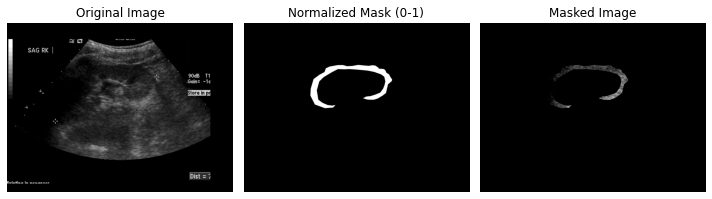

Mean pixel value in masked region: 20.99
Mean pixel value in original imagae: 19.79


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

im_path_png = r'C:\Users\rckyh\Desktop\repo\kidney_ped\kidney\images\raw\100__Still_images_5376_IM-0001-0023_masked.png'
mask_path_png = r'C:\Users\rckyh\Desktop\repo\kidney_ped\kidney\images\masks\100__Still_images_5376_IM-0001-0023_cortex_segmentation.png'

# Step 1: Load image and mask
im = np.array(Image.open(im_path_png).convert('L'))   # Convert to grayscale
mask = np.array(Image.open(mask_path_png).convert('L'))

# Step 2: Normalize mask to 0 and 1
mask_binary = (mask > 0).astype(np.uint8)  # Converts non-zero values to 1 and zero to 0

# Step 3: Apply mask to extract only the masked region
masked_image = im * mask_binary

# Step 4: Display
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask_binary, cmap='gray')
plt.title('Normalized Mask (0-1)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(masked_image, cmap='gray')
plt.title('Masked Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 5: Compute mean of masked region (non-zero mask)
masked_values = im[mask_binary == 1]
mean_val = masked_values.mean()
mean_val_original = im.mean()
print(f"Mean pixel value in masked region: {mean_val:.2f}")
print(f"Mean pixel value in original imagae: {mean_val_original:.2f}")

In [ ]:
im_path_NRRD = r'C:\Users\rckyh\Desktop\repo\kidney_ped\kidney\images\masks\nrrdFiles\1__Still images_IM-0001-0020_cortex_segmentation_mask_1.nrrd'
mask_path_NRRD = r'C:\Users\rckyh\Desktop\repo\kidney_ped\kidney\images\raw\nrrdFiles\1__Still images_IM-0001-0020_masked.nrrd'

image = sitk.ReadImage(im_path_NRRD)
mask = sitk.ReadImage(mask_path_NRRD)

# Convert mask to binary (0 and 1)
mask = sitk.BinaryThreshold(mask, lowerThreshold=1, upperThreshold=255, insideValue=1, outsideValue=0)

# Convert images to numpy arrays
image_array = sitk.GetArrayFromImage(image)
mask_array = sitk.GetArrayFromImage(mask)

# If the image is 3D, use the first slice for visualization
image_array_2d = image_array[0] if image_array.ndim > 2 else image_array
mask_array_2d = mask_array[0] if mask_array.ndim > 2 else mask_array

# Mask the image
masked_image_array = image_array_2d * mask_array_2d

# Plot the original image, mask, and masked overlay
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display original image
axes[0].imshow(image_array_2d, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display mask
axes[1].imshow(mask_array_2d, cmap='gray')
axes[1].set_title('Mask')
axes[1].axis('off')

# Display masked overlay
axes[2].imshow(masked_image_array, cmap='gray')
axes[2].set_title('Masked Overlay')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Compute mean of masked region
masked_values = masked_image_array[mask_array_2d == 1]
mean_masked_value = np.mean(masked_values)

print(f"Mean of the masked region: {mean_masked_value}")
